# Ford Gobike System 
## by Shehana

## Preliminary Wrangling

The Data consists of information about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')

### What is the structure of your dataset?

In [58]:
df1.shape

(183412, 16)

In [17]:
df1.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


### What is/are the main feature(s) of interest in your dataset?

I would like to know about the duration of the trip and the factors that effecting duration time such as: age, gender , customer type. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- member_birth_year will help me know the ages of our users. 
- duration_sec will help me to know the duration of each trip in minute.
- member gender. 

# Cleaning 

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
df2 = df1.copy()

In [4]:
df2['trip_duration_min'] = df2['duration_sec']/60   # generate new feature for trip duration time in a minuate. 
df2['trip_duration_min'] = df2['trip_duration_min'].astype(int)

In [5]:
df2['member_birth_year'] = df2['member_birth_year'].fillna(0)
df2['member_birth_year'] = df2['member_birth_year'].astype(int)

In [6]:
import datetime
now = datetime.datetime.now().year

df2['age'] = now - df2['member_birth_year']

In [7]:
df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

In [8]:
df2['start_time'] = pd.to_datetime(df2['start_time'])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df2['start_hour']= df2['start_time'].dt.hour

In [10]:
df2['month'] = df2.start_time.dt.strftime('%B')

In [11]:
df2['month'] = df2['month'].astype('category')

In [13]:
df2['month'].value_counts()

February    183412
Name: month, dtype: int64

In [65]:
df2.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
trip_duration_min             0
age                           0
dtype: int64

In [12]:
df2.dropna(inplace=True)

In [15]:
df2.age.quantile([.25, .5, .75 , .99])

0.25    29.0
0.50    34.0
0.75    41.0
0.99    66.0
Name: age, dtype: float64

In [13]:
df2 = df2.query('age <= 66')

In [17]:
df2.age.max()

66

In [18]:
df2.trip_duration_min.quantile([.25, .5, .75 , .99])

0.25     5.0
0.50     8.0
0.75    13.0
0.99    52.0
Name: trip_duration_min, dtype: float64

In [14]:
df2 = df2.query('trip_duration_min <= 55')

In [23]:
df2.trip_duration_min.max()

55

In [21]:
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,trip_duration_min,age,start_hour
count,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000,171709.000000
mean,615.042496,138.986931,37.771014,-122.351451,136.444898,37.771203,-122.351012,4483.680139,1985.176584,9.758731,35.823416,13.462352
std,433.130934,111.460684,0.100840,0.118117,111.060674,0.100736,0.117661,1658.384424,9.372966,7.224042,9.372966,4.743909
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1955.000000,1.000000,20.000000,0.000000
25%,321.000000,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3804.000000,1980.000000,5.000000,29.000000,9.000000
50%,507.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4960.000000,1987.000000,8.000000,34.000000,14.000000
75%,778.000000,239.000000,37.797320,-122.283093,237.000000,37.797673,-122.285633,5505.000000,1992.000000,12.000000,41.000000,17.000000
max,3359.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,55.000000,66.000000,23.000000


In [55]:
df2.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min,age,start_hour,month
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,26,47,23,February


## Univariate Exploration

> In this section, we will investigate distributions of individual variables. If
we see unusual points or outliers, we will take a deeper look to clean things up
and prepare ourself to look at relationships between variables.

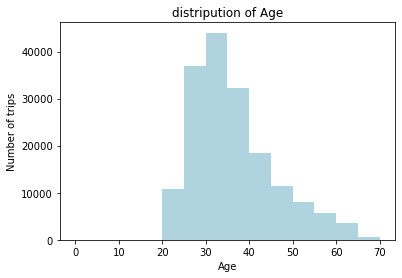

In [89]:
bins = np.arange(0, df2['age'].max()+5, 5)
plt.hist(data = df2, x = 'age' , bins = bins, color = '#afd4e0' );
plt.title('distripution of Age')
plt.xlabel('Age')
plt.ylabel('Number of trips');

Conclusion: The distribution is Skewed to the right. age is between 20 to 60. 
    avg is between 30 to 40. 

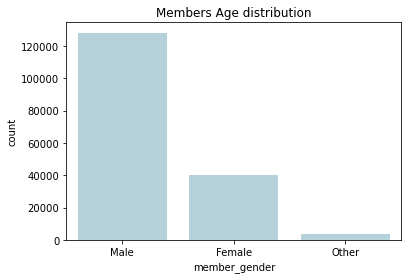

In [90]:
color = sb.color_palette()[0]
order = df2.member_gender.value_counts().index
sb.countplot(data=df2 , x='member_gender' , order=order, color = '#afd4e0')
plt.title('Members Age distribution');

Conclusion: as we can see, males represent the majority of the users. 

(0.0, 60.0)

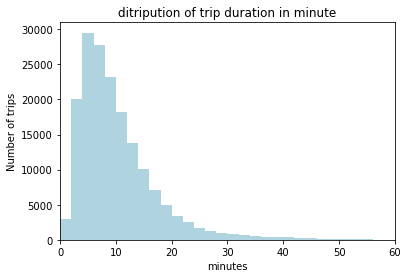

In [99]:
bins = np.arange(0, df2['trip_duration_min'].max()+2, 2)
plt.hist(data = df2, x = 'trip_duration_min' , bins = bins, color = '#afd4e0');
plt.title('distripution of trip duration in minute')
plt.xlabel('minutes')
plt.ylabel('Number of trips');
plt.xlim(0,60)

Conclusion: The distribution is Skewed to the right. Most users have their journey minutes under 30. 

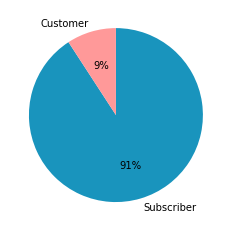

In [106]:
colors = ['#1994bd','#ff9999'] 
sorted_counts = df2['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False , colors = colors , autopct='%1.0f%%');

Conclusion:The majority of users types are subscribers by 91% 

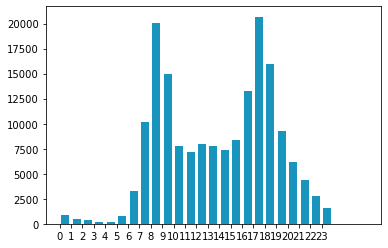

<Figure size 1152x432 with 0 Axes>

In [105]:
bins = np.arange(0 , df2['start_hour'].max()+5, 1)
plt.hist(data=df2, x='start_hour', bins = bins , rwidth = 0.7 , color = '#1994bd' )
plt.xticks(np.arange(0, df2['start_hour'].max()+1, 1));
plt.figure(figsize=(16, 6));

Conclusion: as we can see, the peak hours is between 8am to 9am and 5pm to 6 pm

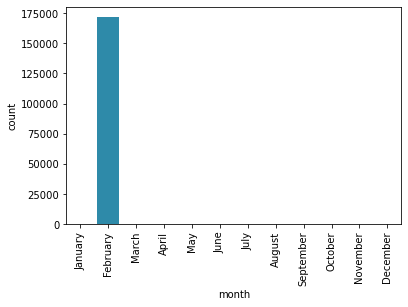

In [104]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories= month_list)
df2['month'] = df2['month'].astype(month_category)
sb.countplot(data=df2, x='month', color='#1994bd');
plt.xticks(rotation=90)
plt.show()

Conclusion: Obviously we only have one month's data.which is February 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. From the distribution of age we noticed that age is between 20 to 60. and the avg is between 30 to 40.
   Age distribution follows Skewed to the right distribution.

2. the peak hours are those from 8 - 9 am and from 4 - 6 pm. 

4. Customers represent 9%  percent of users, whereas subscribers represents 91 % percent. 

5. Males represent the majority of the users. 

Unusual distributions:
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


The duration has outliers that we removed.

The Age has outliers that we removed.

We created new features:
1.  Start_hour 
2. month 

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data. 

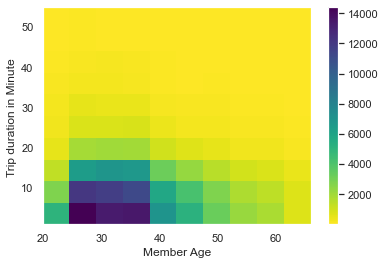

In [51]:
plt.hist2d(data = df2, x = 'age', y = 'trip_duration_min', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Member Age')
plt.ylabel('Trip duration in Minute ');

Younger users have higher minutes.

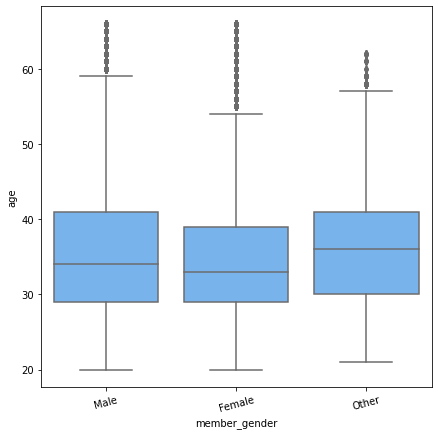

In [111]:
sb.boxplot(data=df2, x='member_gender', y='age', color = '#66b3ff')
plt.xticks(rotation = 15)
plt.gcf().set_size_inches(7,7)

The men's group has older ages than the women's group. 

In [55]:
df2.member_gender.value_counts()

Male      128065
Female     40135
Other       3509
Name: member_gender, dtype: int64

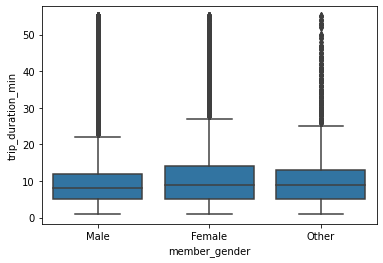

In [108]:
gender_type = ['Male', 'Female', 'Other']
base_color = sb.color_palette()[0]
type_g = pd.api.types.CategoricalDtype(ordered=True, categories= gender_type)
df2['member_gender'] = df2['member_gender'].astype(type_g);
sb.boxplot(data=df2, x='member_gender', y='trip_duration_min', color = color );

Men riders seem to take less minutes than the women on their trip. 

<AxesSubplot:xlabel='member_gender', ylabel='count'>

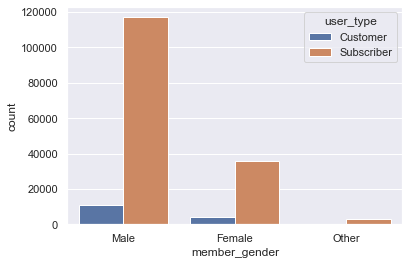

In [64]:
sb.countplot(data = df2, x = 'member_gender', hue = 'user_type')

Males has subscription more than women. this is because most of the users are men. 
Users generally prefer to subscribe.

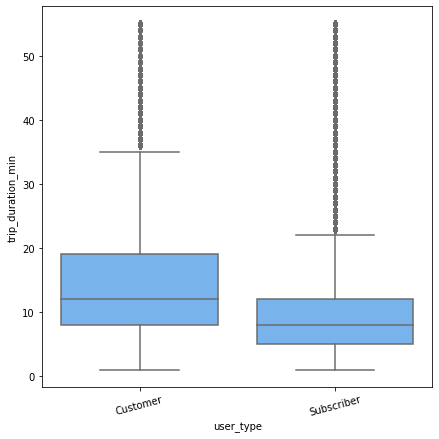

In [46]:
sb.boxplot(data=df2, x='user_type', y='trip_duration_min', color = '#66b3ff')
plt.xticks(rotation = 15)
plt.gcf().set_size_inches(7,7)

Custmors has higer duration in their trips. 

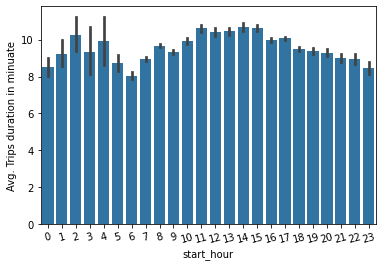

<Figure size 1152x432 with 0 Axes>

In [43]:
color = sb.color_palette()[0]
sb.barplot(data=df2, x='start_hour', y='trip_duration_min', color=color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Trips duration in minuate')
plt.figure(figsize=(16, 6));

from 2 am to 3 am and from 11am to 3 pm have the higher averge in trip duration. by 10 minuate. 

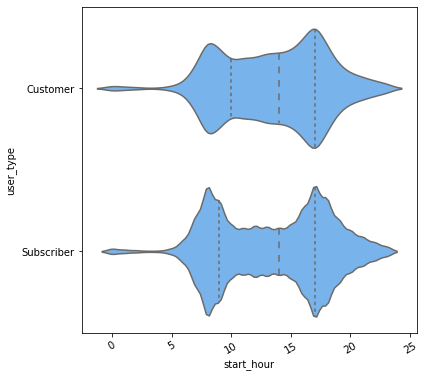

In [114]:
sb.violinplot(data=df2, x='start_hour', y='user_type', color='#66b3ff', inner='quartile')
plt.xticks(rotation=30);
plt.gcf().set_size_inches(6,6)

it seems that subscriber users use a bicycles ride more often druing the morning from 8 to 10 am. 

and from 4 to 6 pm customers and subscriber  have high use of bicycles ride

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- age vs duration: Younger users have higher minutes duration, as the age increase the minutes decrease 
- age vs gender: The men's group has older ages than the women's group. 
- gender vs duration: Men riders seem to take less minutes than the women on their trip. 
- gender vs user type: Males has subscription more than women. this is because most of the users are men. 
  Users generally prefer to subscribe.
- user type vs duration: Custmors has higer duration in their trips.
- start hour vs duration: from 2 am to 3 am and from 11am to 3 pm have the higher averge in trip duration. by 10 minuate. 
- start hour vs user type: it seems that subscriber users use a bicycles ride more often druing the morning from 8 to 10 am.  and from 4 to 6 pm customers and subscriber have high use of bicycles ride. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- the user type start hour. the subscribers seems to often use a ride in the morining while customers often use the ride druning the day. 

## Multivariate Exploration



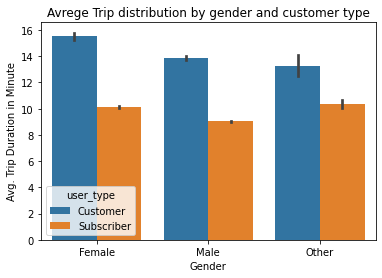

In [22]:
sb.barplot(data = df2, x = "member_gender", y = "trip_duration_min", hue='user_type')
plt.xlabel('Gender');
plt.ylabel('Avg. Trip Duration in Minute')
plt.title("Avrege Trip distribution by gender and customer type")

plt.show()

Females Customers have a longer duration on average. 

C:\miniconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\miniconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


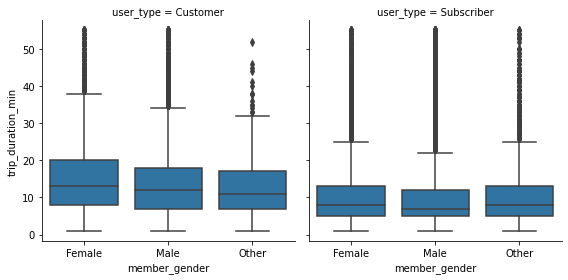

In [16]:
g = sb.FacetGrid(data = df2, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'trip_duration_min')

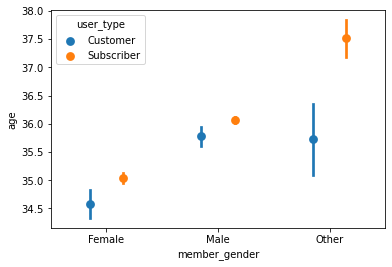

In [32]:
ax = sb.pointplot(data = df2, x = 'member_gender', y = 'age', hue = 'user_type',
                  dodge = 0.3, linestyles = "")

- Females Custmores are younger on the averege 
- other group has more ages range between 35 to 36. on the averege 
- other group subscriber has older age on the averege

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!